In [1]:
### Figure 3F for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap.umap_ as umap
import pathlib
import os
from pathlib import Path
import hdbscan

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
np.random.seed(42)

In [2]:
# set data input folder
# download files described in README.md to this folder
data_input_folder = "../../"

# set output folder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [3]:
# Import the Hela HPLM gene level profiles
cp257_hplm_df = pd.read_csv(os.path.join(data_input_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___HPLM___ALLWELLS_gene_aggregated.csv.gz'))
cp257_hplm_df = cp257_hplm_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# Import the Hela HPLM hits from the hit calling process then subset the gene level profiles for all hits 
comp_spef_hits = pd.read_csv('../../Fig3_A_B/cp257_hplm_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv')
comp_spef_hits = comp_spef_hits.rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hits = pd.read_csv('../../Fig3_A_B/cp257_hplm_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv')
whole_cell_hits = whole_cell_hits.rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hit_list = list(whole_cell_hits.index)

hit_list = list(comp_spef_hits.index) + list(whole_cell_hits.index)
df_hits = cp257_hplm_df.loc[hit_list]
df_hits


,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_1_3,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_HuMoment_1,...,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_02_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_WGA_10_00_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_02_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_03_256,Nuclei_Texture_Variance_DAPI_Painting_10_03_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCA12,0.046641,0.003716,0.029627,-0.001628,-0.050088,-0.001151,-0.120196,0.106839,0.028537,-0.083236,...,-0.002190,-0.097184,-0.172442,-0.152118,-0.074674,-0.011332,-0.085357,-0.069697,-0.131412,-0.180772
ABCB4,0.012981,-0.065788,-0.010279,-0.003576,0.008386,0.000279,-0.082302,0.110517,-0.033144,-0.037297,...,0.001077,-0.095521,-0.083826,-0.046140,-0.187211,-0.105152,-0.093550,0.027690,-0.025057,0.046747
ABCB5,0.008738,0.068559,0.005944,0.007269,0.008624,0.003714,-0.127265,0.092426,0.095370,0.110191,...,-0.109685,0.015813,-0.017631,-0.029420,0.076869,0.224691,0.003504,0.026630,0.111763,0.090989
ABCC4,0.003547,-0.117888,-0.007878,-0.002300,-0.006497,-0.000706,0.058559,0.014142,-0.199852,-0.056698,...,-0.052490,-0.070139,-0.087233,-0.065748,-0.181227,-0.287680,-0.363040,-0.379078,-0.236850,-0.035882
ABCF2,0.022766,0.174755,-0.014021,0.001288,0.072661,0.002041,-0.622196,0.574030,0.657998,-0.108905,...,-0.082098,-0.205022,-0.132027,-0.209065,-0.349670,-0.251723,-0.204657,-0.402130,-0.161090,-0.187340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM6,0.020354,0.004532,-0.033463,0.009186,-0.011431,-0.000901,0.135814,-0.236402,-0.281332,-0.114684,...,-0.106403,-0.117882,-0.090810,-0.113893,-0.205126,-0.357806,-0.144143,-0.202656,-0.091221,-0.560790
ZSWIM7,0.002570,-0.119427,0.004040,-0.005746,-0.015322,0.001861,-0.138967,-0.006796,0.045777,-0.249543,...,-0.197540,-0.073032,-0.016957,-0.048796,-0.336193,-0.364650,-0.378735,-0.294673,-0.381242,-0.510563
ZSWIM8,-0.013826,0.228313,0.024481,-0.002546,0.020577,0.000311,-0.081970,0.100603,0.069663,-0.169832,...,0.028297,-0.132432,-0.151381,-0.129630,0.071587,-0.034877,-0.105099,0.387505,0.076288,0.132016


In [9]:
# Perform principal componenet analysis and select components representing 70% of variation in data & print the variation of components selected by PCA
pca = PCA()
pca.fit(df_hits)
x = list(pca.explained_variance_ratio_)
y = [sum(x[:i+1]) for i in range(len(x))]
y[49]

0.7026760408791991

In [10]:
# Perform principal componenet analysis and select components representing 70% of variation in data
pca = PCA(n_components=50)
df_hits_pca = pd.DataFrame(pca.fit_transform(df_hits),index=df_hits.index)
df_hits_pca

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCA12,-1.707118,-3.768494,-6.426919,-1.483909,-0.997404,-0.252512,0.141813,0.761165,-1.426929,-0.353599,...,-0.664166,0.333047,0.736967,0.218295,0.074005,-0.058746,-0.008308,0.576208,0.276766,0.293852
ABCB4,2.427556,-2.452438,-4.710102,0.317012,0.377106,-1.414936,-0.168224,0.280482,-0.728172,-0.233413,...,-0.088520,-0.108562,0.123959,0.089817,-0.084531,-0.244228,-0.667428,0.316395,-0.330621,0.086019
ABCB5,2.060636,-3.369897,0.110636,0.218584,-0.755954,-1.282548,-2.531436,-0.081390,-1.110732,-0.958512,...,-0.382675,-0.572359,-1.325948,0.753052,-0.722403,0.238784,0.644974,-0.067260,0.194338,-0.612193
ABCC4,-0.412462,3.017291,2.199687,-2.548840,-1.720900,-0.251847,-1.281535,0.339883,-0.127284,0.071796,...,-0.590385,-0.351813,-0.514532,-0.276799,-0.048587,-0.122438,-0.448696,-0.433393,-0.509100,0.898264
ABCF2,-2.614479,4.839262,-5.597514,-5.348641,2.775196,-0.880645,0.463371,-0.166488,-0.491108,1.064015,...,0.031261,0.083670,0.320769,0.597819,0.468693,1.197422,-0.112684,-0.242105,-0.418873,0.156818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM6,-9.668646,-0.026173,4.690097,-2.295687,0.737176,-0.220790,-0.698265,0.373116,-0.215358,0.942404,...,0.203227,-1.277615,0.116592,0.315537,0.263309,-0.015766,0.145058,0.447738,-0.447086,0.731805
ZSWIM7,-6.980554,1.382314,-1.429932,1.441452,0.340661,-0.372218,-2.407767,0.030159,1.303110,-0.322467,...,-0.109077,0.309661,-0.502471,-0.195958,0.180707,-0.339413,0.353503,0.458809,0.359919,0.387581
ZSWIM8,5.268523,-3.134875,-2.651163,-1.975475,-1.910691,1.627296,2.233125,-0.034379,-1.576896,1.116698,...,-1.032984,0.064372,-0.061847,0.034098,0.179068,-1.158468,0.659137,0.539709,0.412702,-0.477913


In [72]:
# Perform UMAP dimentinality reduction to project data into a 2 dimentional plane 

clusterable_embedding = umap.UMAP(
    n_neighbors=4,
    min_dist=0.0,
    n_components=2,
    random_state=43,
    metric = 'cosine',
).fit_transform(df_hits_pca)

In [435]:
# Manually label highlighted hits  
overal_labels = [hit_list.index(i) if i in whole_cell_hit_list else -1 for i in hit_list ]
other_labels = [hit_list.index(i) if i not in whole_cell_hit_list else -1 for i in hit_list ]
highlight_list = [
    # GOBP_GOLGI_VESICLE_TRANSPORT
    'SEC22B','SLC10A7','COG1','COG2','COG3','COG4','COG6','COG7','COG8','SCFD1','TRAPPC1','TRAPPC3','TRAPPC4','YKT6','SYS1','ARFRP1','USO1','NSF',
    'TRAPPC8','PREB',
    # GOBP_PROTEIN_N_LINKED_GLYCOSYLATION
    'DAD1','DPAGT1','ALG11','RPN1','TMEM258','ALG2','NUS1','DHDDS','DDOST','TMEM165',
    # GOBP_DNA_REPLICATION
    'CDK1','CHAF1B','DUT','MCM2','MCM5','MCM6','MCM7','MMS22L','ORC6','RRM1','TONSL','GINS1','GINS2','GINS3','GINS4','POLD3','POLE2','PRIM1',
    'TIMELESS','WDHD1','RPA2','RPA3','PRIM2','SMC3','TIPIN','REV3L','POLD1','RTEL1','CHTF18','RAD51','MCM3','RFC3',
    # GOBP_RIBOSOME_BIOGENESIS
    'BUD23','NOB1','NOC4L','PDCD11','POP7','RIOK1','RPF2','RRP12','WDR36','NOM11','TSR2','KRR1','DDX49','RRP36','DCAF13','NOL11','RPSA','BYSL',
    'RPL24','NOP10','EXOSC2','FCF1','BMS1','DDX52','HEATR1','POP5','URB1','WDR12','ZNHIT6','AATF','ABT1','BRIX1','DDX10','DDX18','DDX21','DDX27',
    'DDX47','DDX54','DDX56','DHX37','DIMT1','EIF6','EMG1','ESF1','EXOSC5','EXOSC7','EXOSC8','EXOSC9','FBL','FTSJ3','GTPBP4','IMP3','IMP4','LTV1',
    'MAK16','MDN1','MPHOSPH10','NAT10','NGDN','NLE1','NOL10','NOL6','NOP14','NOP16','NOP53','NOP56','NOP58','NUP88','NVL','PES1','PWP2','RCL1',
    'RIOK2','RPL7','RPP30','RPS15','RPS16','RPS24','RPS27','RPS6','RRP7A','SRFBP1','TBL3','TRMT112','TSR1','UTP15','UTP18','UTP20','UTP3','UTP6',
    'WDR3','WDR43','WDR46','WDR55','WDR75','XRCC5','XRN2',
    # GOCC_PROTON_TRANSPORTING_TWO_SECTOR_ATPASE_COMPLEX
    'ATP6V1H','ATP6V1G1','ATP6V1B2','ATP6V1A','ATP6V1D','ATP6V1C1','ATP6V1F','ATP6V0D1','ATP6V0C','ATP6V0B','ATP6V1E1',
    # GOCC_LAMELLIPODIUM
    'FLOT1','ACTR2','ACTR3','ARPC2','ARPC3','CAPRIN1','ILK','ITGAV','ITGB1','NCKAP1','RAC1','RAPH1','STX4','ENAH','FERMT2',
    # GOBP_AEROBIC_RESPIRATION
    'SUCLG1', 'DLD', 'DLST', 'OGDH', 'SDHA', 'SDHB', 'SDHD',
    # GOCC_TRANSFERASE_COMPLEX
    'MGA','CAB39','PRKCI','RING1','POLR2E','SGF29','POLD4','POLG2','CUL1','NAA50','POLR2F','WDR61','GTF2F1','SNRPD1','CCNH','CTR9','MED7','NAA15',
    'PRMT1','SGF29',
    # GOCC_MITOCHONDRIAL_MATRIX
    'MRPL46','PDSS2','MRPL10','MRPL41','MRPS17','MRPS7','MRPL20','MRPS12','LONP1','MDH2','MRPL12','MRPL18','MRPL35','NARS2','NDUFA9','NDUFS1','PDSS1',
    'MRPL16','MRPL49','REXO2', 'MRPL21','MRPS35','PTCD1','SARS2','MRPL22','DLAT','MRPL9','MRPS33','MRPL28','MRPS6','PDP2','MRPL32','CDK1','MRPL4',
    'MRPS9','YARS2','CS',
    # GOBP_MITOTIC_CELL_CYCLE
    'CUL3','ORC1','ARID2','CDC25A','POLA1','TRIAP1','CHMP5','TUBG1','TUBA1B','RNF20','RNF40','CKS1B','DDB1','TUBB','MAU2','SCRIB','SIN3A','MTBP',
    'GPSM2','DONSON','MCM4','MYC','PCNA','POLE','PBRM1','RAD21','RAD51C','SMARCD1','TFDP1','DSCC1','NAA10','ACTL6A','CHMP7','TAOK2','KIF14',
    ]

highlight_labels = [hit_list.index(i) if i in highlight_list else -1 for i in hit_list ]
#clusterable_embedding[other_labels, 1]
len(overal_labels)-other_labels.count(-1)

1236

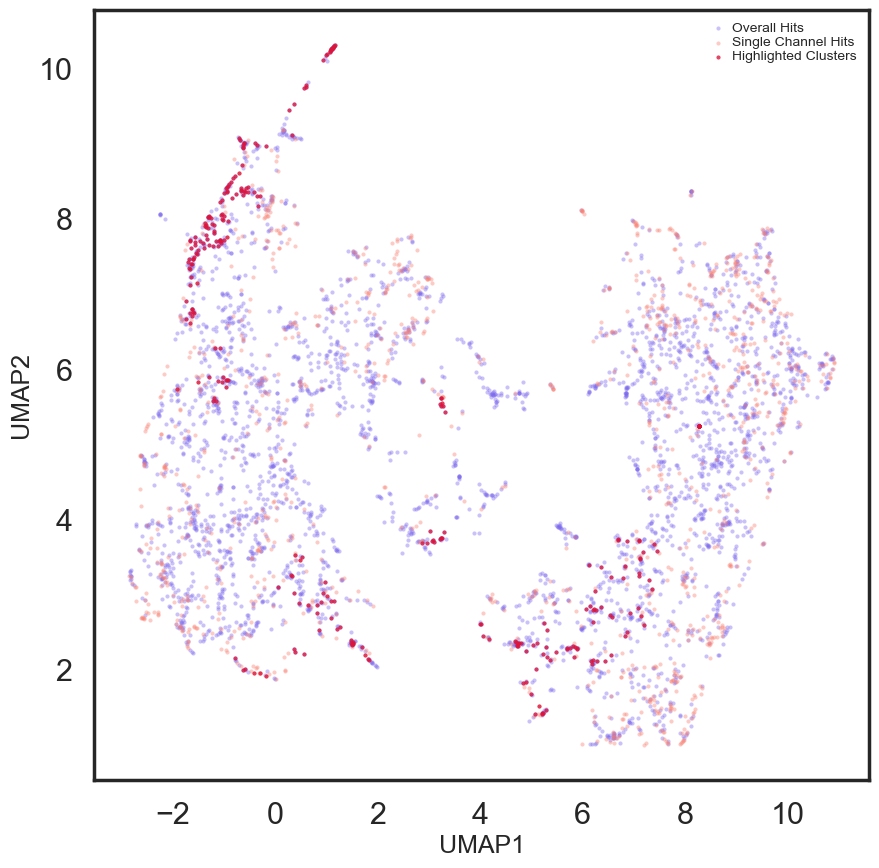

In [436]:
plt.figure(figsize=(10, 10))

plt.scatter(clusterable_embedding[overal_labels, 0],
            clusterable_embedding[overal_labels, 1],
            c='mediumslateblue',#firebrick
            s=1,
            alpha=0.4,
           # cmap='Spectral'
           );

plt.scatter(clusterable_embedding[other_labels, 0],
            clusterable_embedding[other_labels, 1],
            c='salmon',#royalblue burlywood
            s=1,
            alpha=0.4,
           # cmap='Spectral'
           );

plt.scatter(clusterable_embedding[highlight_labels, 0],
            clusterable_embedding[highlight_labels, 1],
            c='crimson',#royalblue burlywood
            s=1,
            alpha=0.8,
           # cmap='Spectral'
           );

plt.xlabel('UMAP1',fontsize=18)
plt.ylabel('UMAP2',fontsize=18)
plt.legend(labels=['Overall Hits','Single Channel Hits','Highlighted Clusters'],loc="upper right",bbox_to_anchor=(1,1), frameon=False, ncol=1,fontsize=10 ,labelspacing=0.1,handletextpad=0)# 


file_name = 'Fig3_F_Hela_hplm_UMAP_clustering.png'
output_file = pathlib.Path(f"{file_name}")
plt.savefig(os.path.join(output_folder,output_file),bbox_inches='tight', dpi=600,facecolor='w', edgecolor='w')